<a href="https://colab.research.google.com/github/AdakMahato/Lyme-Disease-Detection-RESNET/blob/main/Lyme_Disease_Detection_Aadarsha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aadarshamahato","key":"2f025732d4fc32739380307d022a1b6b"}'}

In [ ]:
#! mkdir ~/.kaggle

#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! kaggle competitions download -c 'Lyme Disease Erythema Migrans Rashes'

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d sshikamaru/lyme-disease-rashes


Dataset URL: https://www.kaggle.com/datasets/sshikamaru/lyme-disease-rashes
License(s): copyright-authors
 89% 127M/143M [00:01<00:00, 100MB/s]
100% 143M/143M [00:01<00:00, 123MB/s]


In [ ]:
! unzip 'lyme-disease-rashes'

Streaming output truncated to the last 5000 lines.
  inflating: Lyme Full Statified/Lyme Full Statified/DataSplit/image_folder 2/train/Negative/spider bite rash168.jpg  
  inflating: Lyme Full Statified/Lyme Full Statified/DataSplit/image_folder 2/train/Negative/spider bite rash169.jpg  
  inflating: Lyme Full Statified/Lyme Full Statified/DataSplit/image_folder 2/train/Negative/spider bite rash17.jpg  
  inflating: Lyme Full Statified/Lyme Full Statified/DataSplit/image_folder 2/train/Negative/spider bite rash170.jpg  
  inflating: Lyme Full Statified/Lyme Full Statified/DataSplit/image_folder 2/train/Negative/spider bite rash171.jpg  
  inflating: Lyme Full Statified/Lyme Full Statified/DataSplit/image_folder 2/train/Negative/spider bite rash172.jpg  
  inflating: Lyme Full Statified/Lyme Full Statified/DataSplit/image_folder 2/train/Negative/spider bite rash173.jpg  
  inflating: Lyme Full Statified/Lyme Full Statified/DataSplit/image_folder 2/train/Negative/spider bite rash174.jpg 

In [ ]:
from numpy import asarray

from PIL import Image
# load the image
image = Image.open('/content/RashData/RashData/Validation/Validation_2_Cases/Lyme_Positive/erythema migrans29.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()
pixels = asarray(image)

PNG
RGBA
(627, 471)


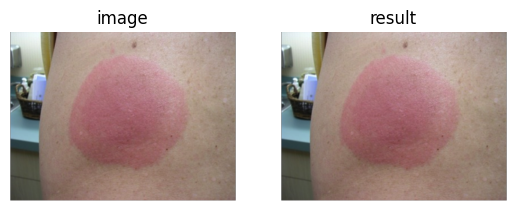

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(image)
ax0.axis('off')
ax0.set_title('image')
ax1.imshow(pixels)
ax1.axis('off')
ax1.set_title('result')
plt.show()

In [ ]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

In [ ]:
TRAIN_DIR = '/content/RashData/RashData/Train/Train_2_Cases'

TEST_DIR = '/content/RashData/RashData/Validation/Validation_2_Cases'

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input


HEIGHT = 300
WIDTH = 300

BATCH_SIZE = 8
class_list = ["class_1", "class_2"]
FC_LAYERS = [1024, 512, 256]
drop = 0.5
EPOCHS = 100



In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.1
)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                  rotation_range = 90,
                                  horizontal_flip = True,
                                  vertical_flip = False)

In [ ]:
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size = (HEIGHT, WIDTH),
                                                    batch_size = BATCH_SIZE)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size = (HEIGHT, WIDTH),
                                                  batch_size = BATCH_SIZE)

Found 357 images belonging to 2 classes.
Found 87 images belonging to 2 classes.


In [ ]:
def build_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        x = Dense(fc, activation='relu')(x)
        x = Dropout(drop)(x)

    predictions = Dense(num_classes, activation='softmax')(x)
    finetune_model = Model(inputs=base_model.input, outputs=predictions)
    return finetune_model

In [ ]:
base_model_1 = ResNet50(weights='imagenet', include_top=False, input_shape=(HEIGHT,WIDTH,3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet50_model = build_model(base_model_1,
                                      dropout = drop,
                                      fc_layers = FC_LAYERS,
                                      num_classes = len(class_list))

In [ ]:
from keras.optimizers import Adam

resnet50_model.compile(optimizer=Adam(learning_rate=1e-5), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
resnet50_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 306, 306, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 150, 150, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 150, 150, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
history = resnet50_model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=20,
    validation_data=test_generator,

    shuffle=True
)


Epoch 1/100
 7/20 [=========>....................] - ETA: 2s - loss: 1.8742 - accuracy: 0.4286

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 [==============================] - 23s 572ms/step - loss: 1.5412 - accuracy: 0.5223 - val_loss: 0.7381 - val_accuracy: 0.5287
Epoch 2/100
20/20 [==============================] - 8s 402ms/step - loss: 1.6482 - accuracy: 0.5312 - val_loss: 0.6665 - val_accuracy: 0.6322
Epoch 3/100
20/20 [==============================] - 8s 407ms/step - loss: 1.4590 - accuracy: 0.5478 - val_loss: 0.6518 - val_accuracy: 0.6897
Epoch 4/100
20/20 [==============================] - 9s 437ms/step - loss: 1.4993 - accuracy: 0.5562 - val_loss: 0.6367 - val_accuracy: 0.6207
Epoch 5/100
20/20 [==============================] - 7s 335ms/step - loss: 1.2408 - accuracy: 0.6187 - val_loss: 0.6408 - val_accuracy: 0.7011
Epoch 6/100
20/20 [==============================] - 8s 398ms/step - loss: 1.3116 - accuracy: 0.5350 - val_loss: 0.6467 - val_accuracy: 0.6667
Epoch 7/100
20/20 [==============================] - 8s 406ms/step - loss: 1.2566 - accuracy: 0.5750 - val_loss: 0.6815 - val_accuracy: 0.5517
Epoch 8/10

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
print(history.history)

{'loss': [1.5412417650222778, 1.6482174396514893, 1.4590449333190918, 1.4992811679840088, 1.240754246711731, 1.311562180519104, 1.2566388845443726, 1.1803911924362183, 1.0779049396514893, 1.0526082515716553, 1.1446301937103271, 0.9796260595321655, 1.0156530141830444, 0.9840704202651978, 1.0769920349121094, 1.0486729145050049, 0.8419389724731445, 0.8327692151069641, 0.9309589266777039, 0.8573018908500671, 0.8380401730537415, 0.7696471810340881, 0.8353549838066101, 0.7654294967651367, 0.756841778755188, 0.8536599278450012, 0.738236665725708, 0.8060048222541809, 0.7525588274002075, 0.6846014261245728, 0.702715277671814, 0.7370375990867615, 0.6986083984375, 0.6039998531341553, 0.6404421329498291, 0.6708921194076538, 0.6865028142929077, 0.6101762056350708, 0.6428498029708862, 0.6735048294067383, 0.6047758460044861, 0.545864462852478, 0.5531332492828369, 0.5573412179946899, 0.5997574925422668, 0.5667711496353149, 0.5169264674186707, 0.5630796551704407, 0.5602453947067261, 0.4800461232662201,

In [ ]:
test_loss, test_accuracy = resnet50_model.evaluate( test_generator)


 4/11 [=========>....................] - ETA: 1s - loss: 0.2161 - accuracy: 0.9375

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/11 [==============================] - 2s 198ms/step - loss: 0.2320 - accuracy: 0.9310


In [ ]:
print(f'Aggregate test accuracy after 100 epochs: {test_accuracy * 100:.2f}%')


Aggregate test accuracy after 100 epochs: 93.10%


In [ ]:
resnet50_model.save("Lyme_Detection.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
